# 7장 시계열 데이터를 다뤄보자

# 7-1. Numpy의 polyfit으로 회귀(regression) 분석하기

In [1]:
!pip install pystan

In [2]:
!pip install fbprophet

In [3]:
!pip install pandas_datareader

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
plt.rcParams['axes.unicode_minus'] = False 

The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 145655 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


INFO:matplotlib.font_manager:generated new fontManager


In [6]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
	
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False
# 그래프에서 마이너스 폰트 깨질 경우 대비

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild() # 이걸 해줘야 plt.rc가 작동

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 27.4 MB of archives.
After this operation, 115 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/uni

INFO:matplotlib.font_manager:generated new fontManager


In [8]:
from google.colab import files
uploaded = files.upload()

Saving 08. example_wp_peyton_manning.csv to 08. example_wp_peyton_manning.csv
Saving 08. example_wp_R.csv to 08. example_wp_R.csv
Saving 08. PinkWink Web Traffic.csv to 08. PinkWink Web Traffic.csv


In [9]:
pinkwink_web = pd.read_csv('08. PinkWink Web Traffic.csv', 
                            encoding='utf-8', thousands=',',
                            names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


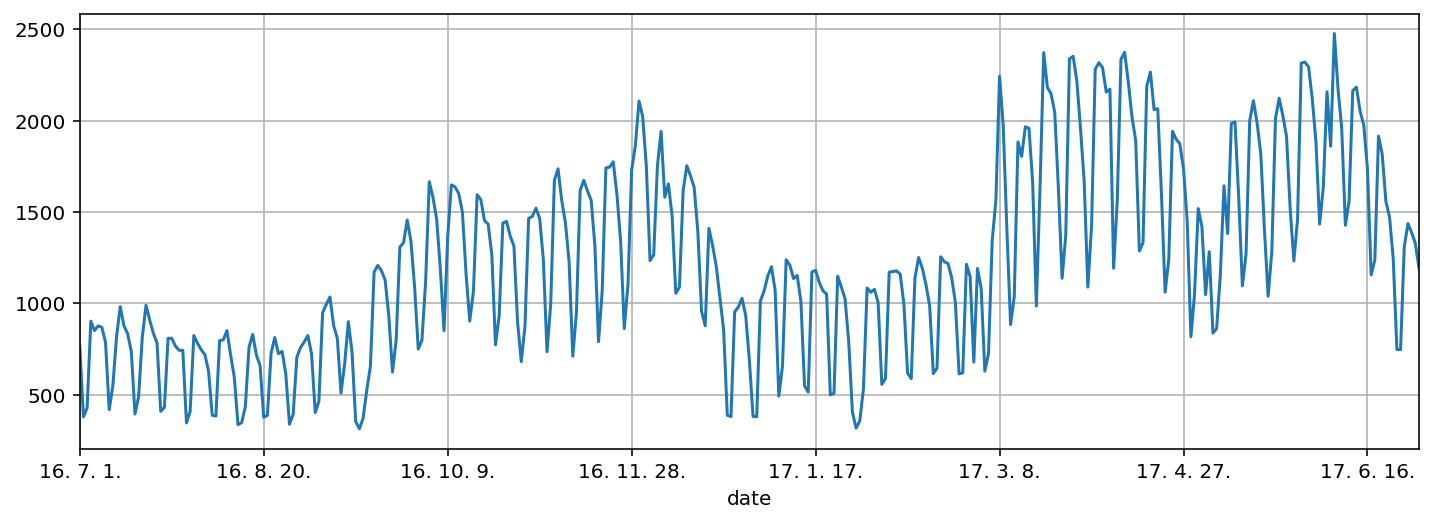

In [10]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [0]:
import numpy as np
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [0]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [13]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.47773021321143


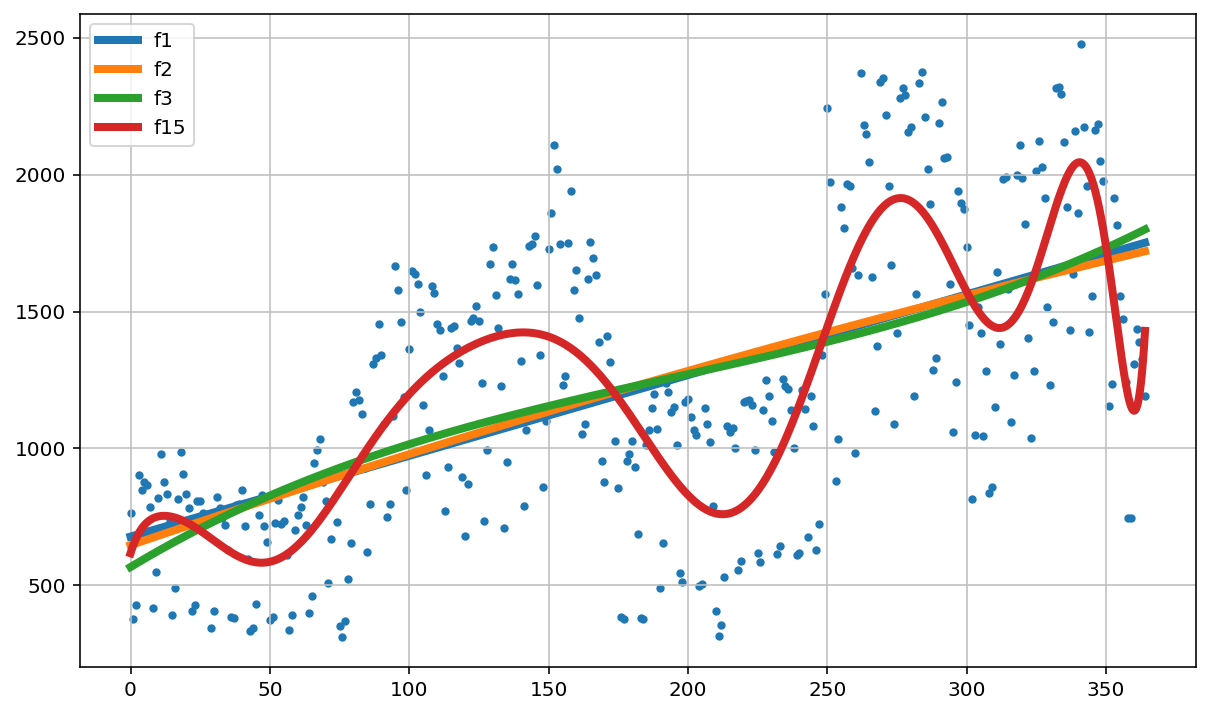

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

# 7-2. Prophet 모듈을 이용한 forecast 예측

In [15]:
now=datetime.now()
print(now)

2019-12-16 05:14:33.060537


In [16]:
nowDate=now.strftime('%Y-%m-%d')
print(nowDate)

2019-12-16


In [17]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


# Prophet 오브젝트의 predict 메소드를 사용

# yhat: 예측 결과, 
# yhat_lower: 예측 최소 값, 
# yhat_upper:예측 최대 값

In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,950.381120,742.446469,1159.382220
421,2017-08-26,535.440888,327.338411,743.851572
422,2017-08-27,667.756779,452.664769,876.053733
423,2017-08-28,1220.165548,1005.930302,1434.922026
424,2017-08-29,1255.791643,1050.138782,1455.967503


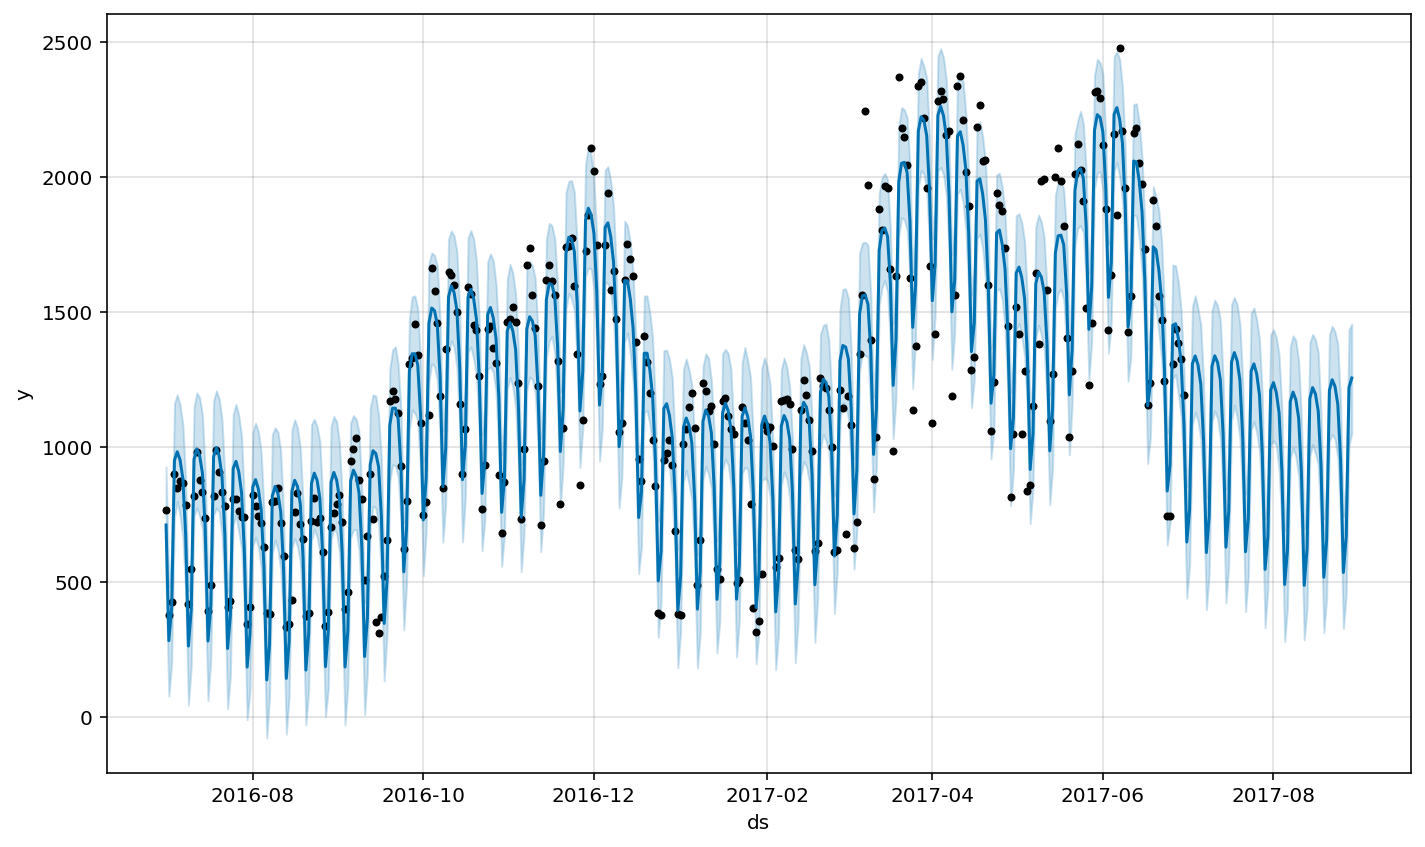

In [20]:
m.plot(forecast);

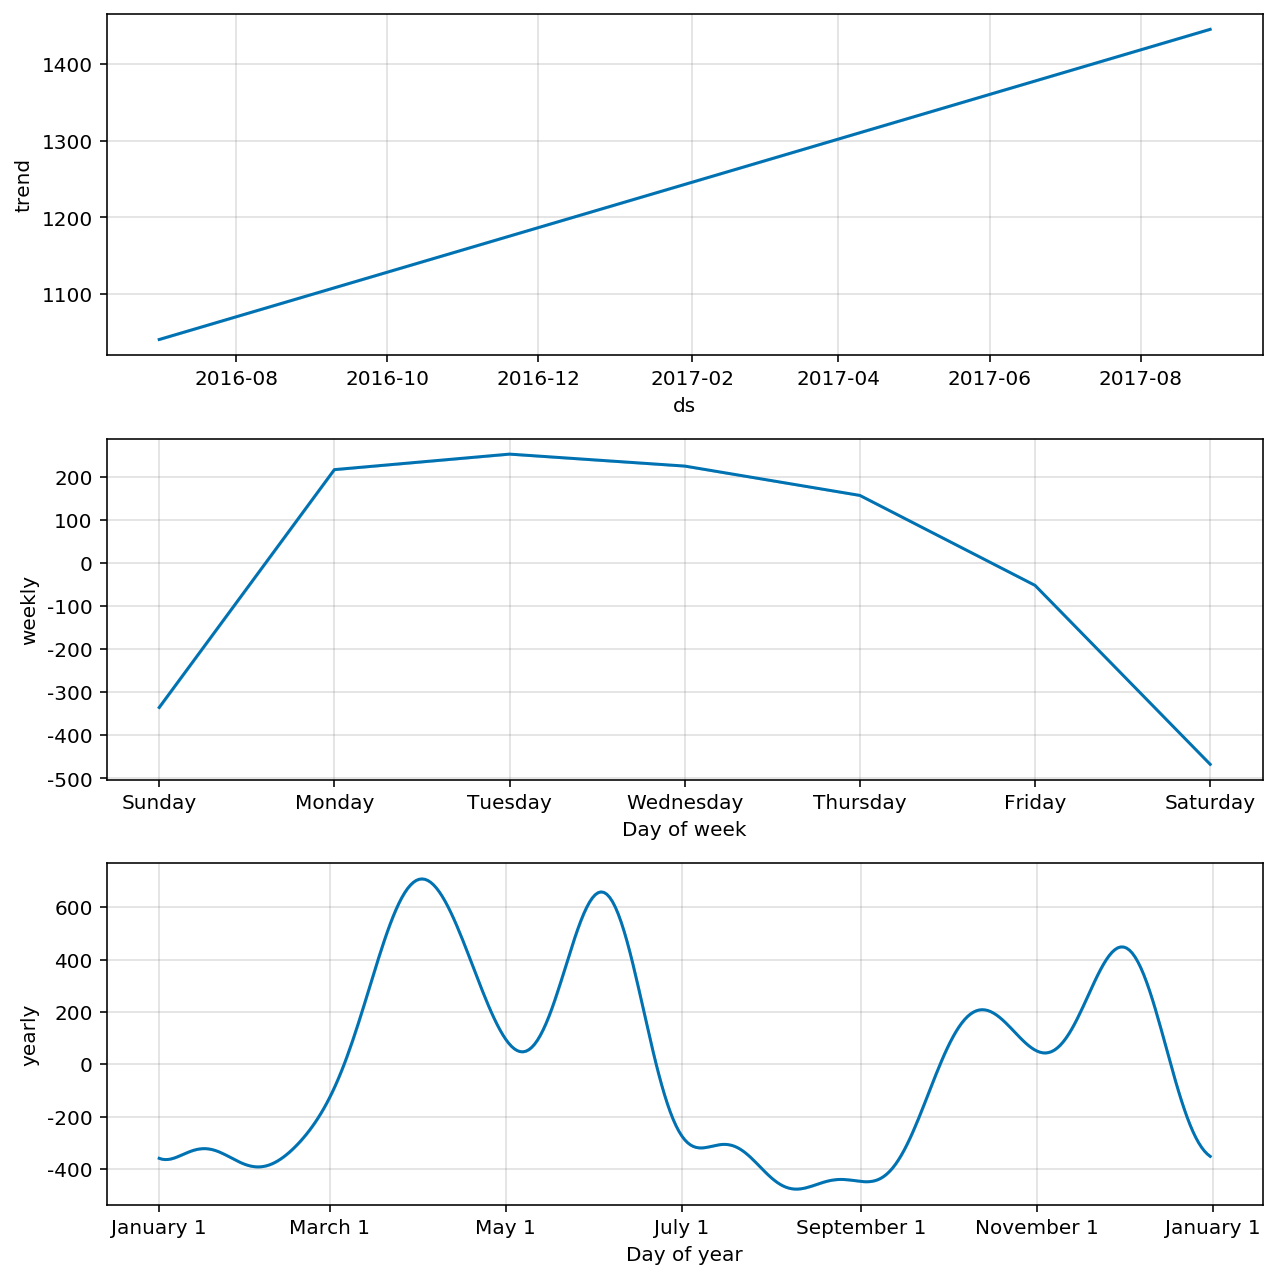

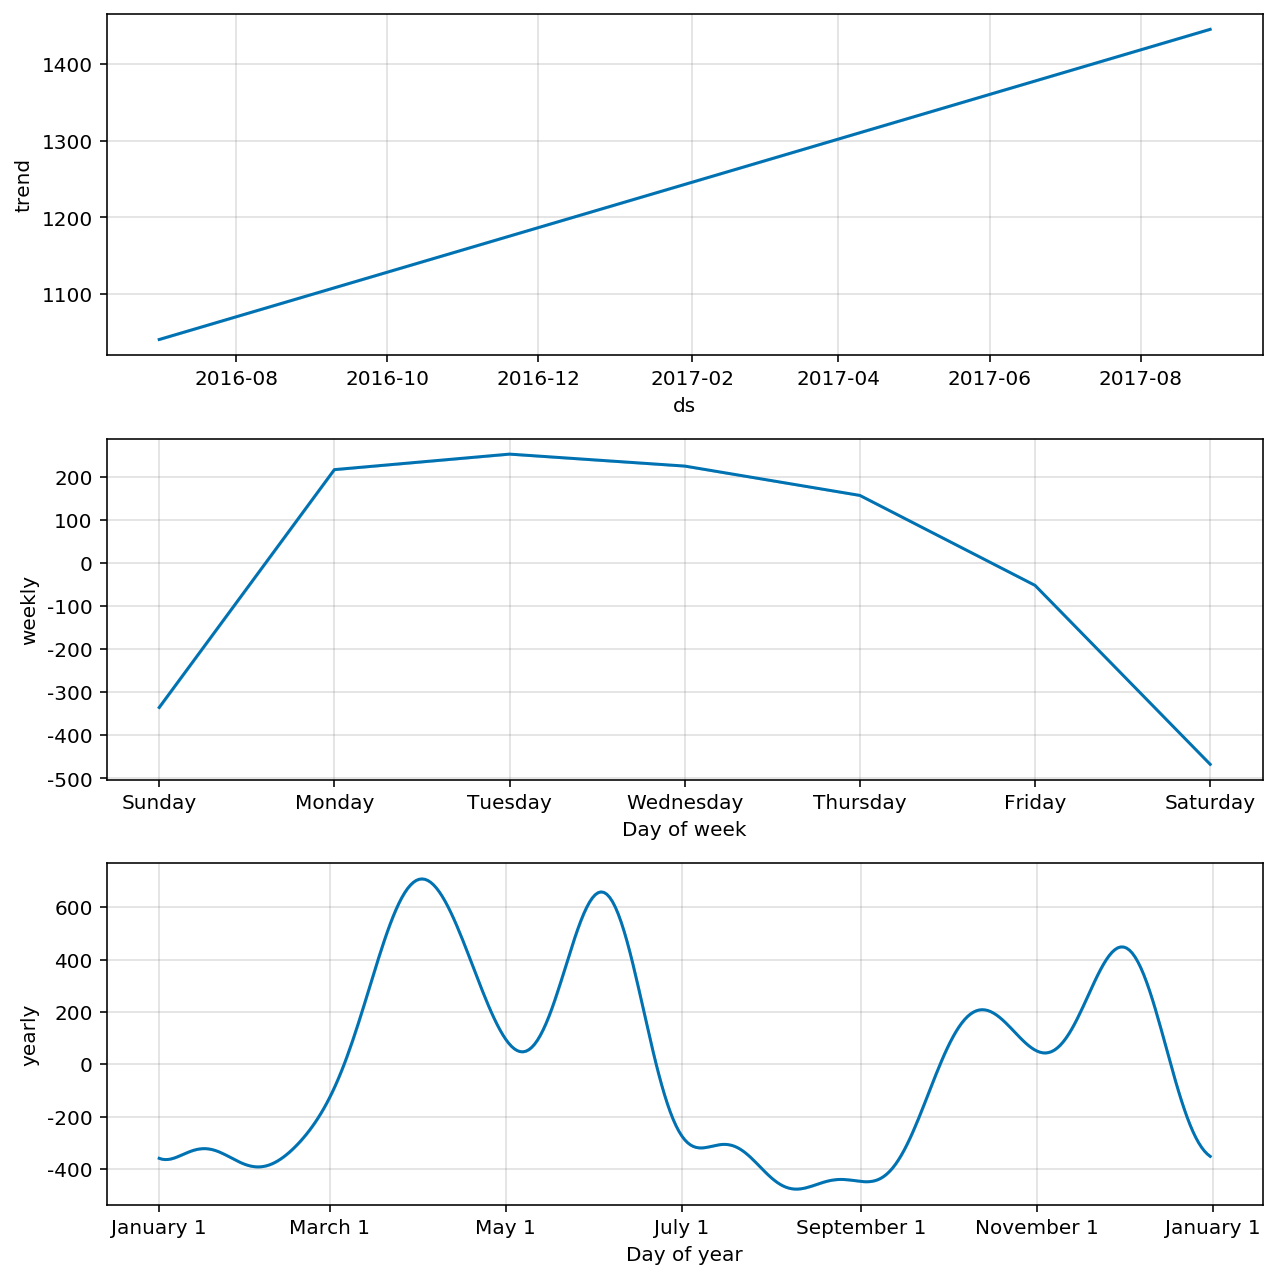

In [21]:
m.plot_components(forecast)

# 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [22]:
pip install yfinance as yf

  Created wheel for yfinance: filename=yfinance-0.1.52-py2.py3-none-any.whl size=21997 sha256=feb2db6eda19664133fbfe89497f189f75c010c1ec0b5572333d382538619e3b
  Stored in directory: /root/.cache/pip/wheels/1b/9d/ce/929e851fc7d649cd962c177220ad985675785aa97c54df5714
  Created wheel for yf: filename=yf-0.0.1-cp36-none-any.whl size=1154 sha256=01351b463c0d36a4e6465ec87fc3eaa7b4b5429c06eff5ff32b600b3142435c3
  Stored in directory: /root/.cache/pip/wheels/c0/d2/7f/bdbe252458b9d14fc7143ecd6102ea06123802dac6f2cdca7c
Successfully built yfinance yf


In [23]:
from pandas_datareader import data

start_date = datetime(2017,1,1) 
end_date = datetime(2017,4,30)
ks = data.get_data_yahoo("^KS11",start_date, end_date) # KOSPI 지수
#ks = data.DataReader("^KS11","yahoo",start_date, end_date)
ks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,2044.069946,2028.469971,2034.310059,2043.969971,268100,2043.969971
2017-01-04,2046.290039,2040.609985,2046.290039,2045.640015,371500,2045.640015
2017-01-05,2046.500000,2039.489990,2045.520020,2041.949951,541300,2041.949951
2017-01-06,2051.840088,2045.660034,2048.110107,2049.120117,455400,2049.120117
2017-01-09,2053.179932,2046.469971,2053.179932,2048.780029,398300,2048.780029


# 삼성 주가 가져오기

In [24]:
from pandas_datareader import data

start_date = datetime(2009,7,1) 
end_date = datetime(2019,7,31)
ss = data.get_data_yahoo("005930.KS",start_date, end_date) # KOSPI 지수
ss.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,2.284350
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,2.280561
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,2.276772
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,2.401787
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,2.462400


In [25]:
ss.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-26,47150.0,46550.0,46650.0,47150.0,7873886.0,47150.0
2019-07-29,47050.0,46000.0,46800.0,46100.0,6856846.0,46100.0
2019-07-30,46850.0,46300.0,46300.0,46550.0,5551014.0,46550.0
2019-07-31,46600.0,45000.0,46200.0,45350.0,12872916.0,45350.0
2019-08-01,45500.0,44850.0,44900.0,45200.0,7811181.0,45200.0


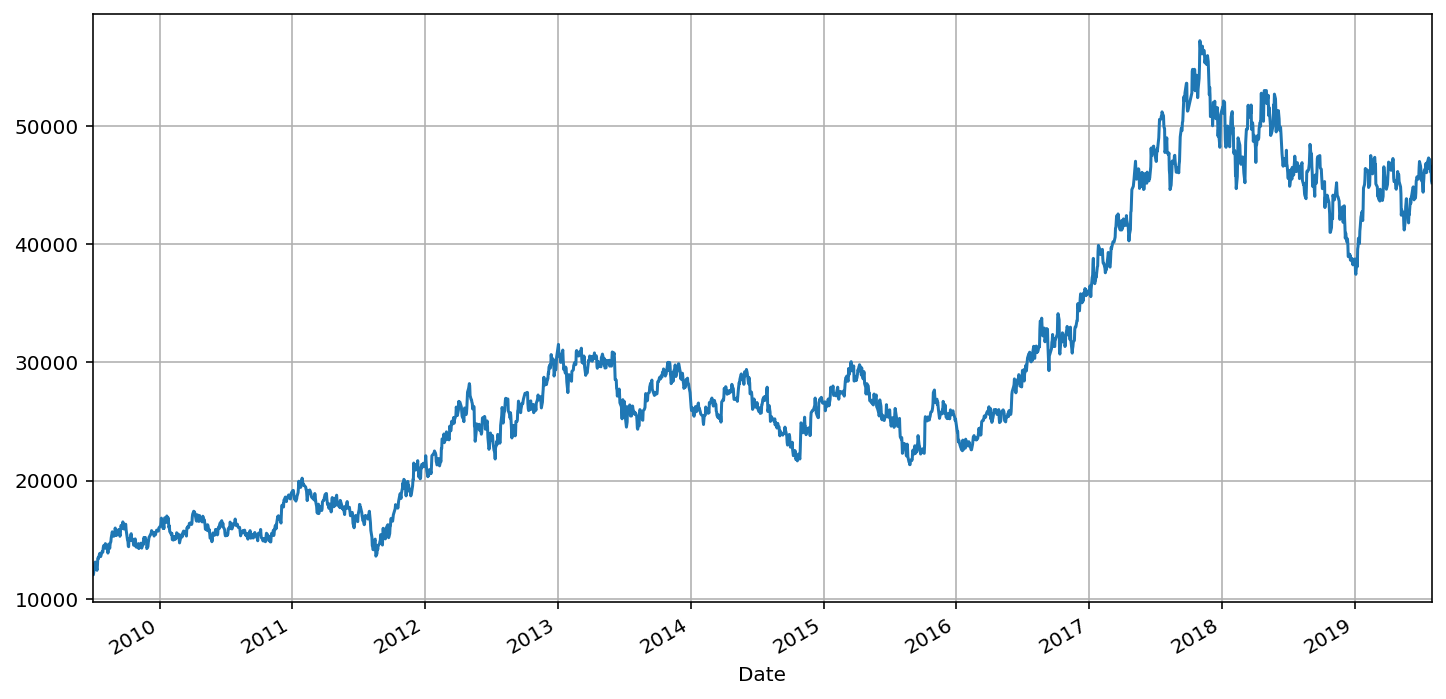

In [26]:
ss['Close'].plot(figsize=(12,6), grid=True);

# 일부 구간을 짤라내어 결과 예측에 사용

In [27]:
ss_trunc = ss[:'2016-12-31']
ss_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,2.284350
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,2.280561
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,2.276772
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,2.401787
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,2.462400
...,...,...,...,...,...,...
2016-12-23,36080.0,35600.0,36020.0,35640.0,8334850.0,1775.398682
2016-12-26,36000.0,35560.0,35600.0,35960.0,4823600.0,1791.339478
2016-12-27,36200.0,35860.0,35980.0,35980.0,4653450.0,1792.335571


In [28]:
df = pd.DataFrame({'ds':ss_trunc.index, 'y':ss_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2009-07-01,12060.0
1,2009-07-02,12040.0
2,2009-07-03,12020.0
3,2009-07-06,12680.0
4,2009-07-07,13000.0


# 카카오 주식 가져오기

In [29]:
from pandas_datareader import data

start_date = datetime(2009,7,1) 
end_date = datetime(2019,7,31)
kk = data.get_data_yahoo("035720.KS",start_date, end_date) # KOSPI 지수
 # 일부 구간을 짤라내어 결과 예측에 사용
kk.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,45200.0,43050.0,44500.0,43050.0,151213.0,40728.570312
2009-07-02,43850.0,41900.0,43100.0,42650.0,165505.0,40350.136719
2009-07-03,43600.0,41650.0,41900.0,43550.0,167152.0,41201.609375
2009-07-06,44750.0,43250.0,43550.0,43550.0,107562.0,41201.609375
2009-07-07,46000.0,43200.0,43800.0,45700.0,335631.0,43235.667969


# 일부 구간을 짤라내어 결과 예측에 사용

In [0]:
kk_trunc=kk[:'2017-12-31']

# 삼성 데이터로 그래프그리기 

In [0]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [32]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2223,2017-12-25
2224,2017-12-26
2225,2017-12-27
2226,2017-12-28
2227,2017-12-29


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2223,2017-12-25,38536.609840,35173.846845,41720.889582
2224,2017-12-26,38526.054328,35575.564995,41663.501792
2225,2017-12-27,38461.453724,35209.062065,41623.081574
2226,2017-12-28,38431.562086,35224.729308,41408.909503
2227,2017-12-29,38339.925731,34898.904958,41600.252353


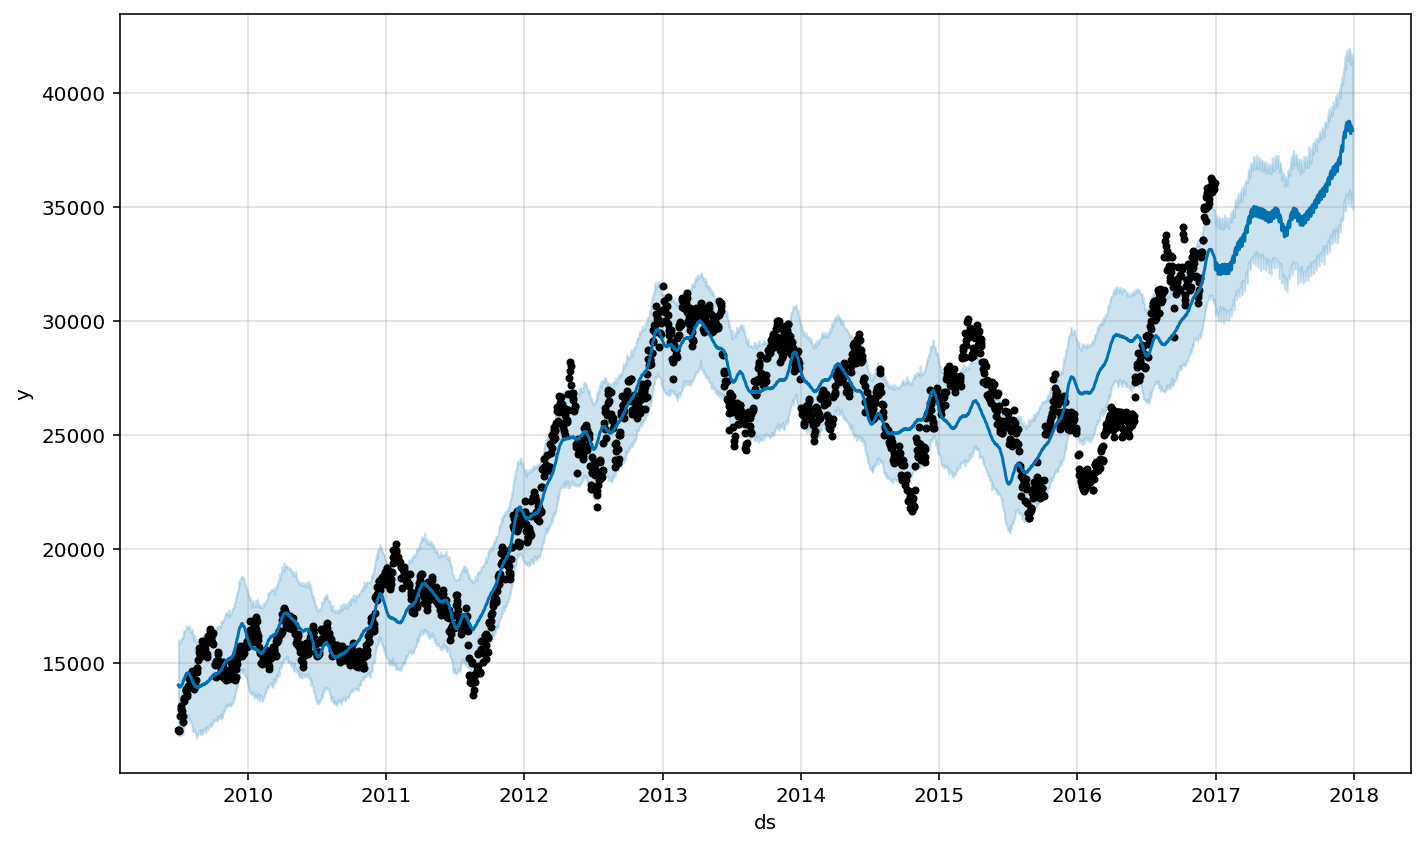

In [34]:
m.plot(forecast);

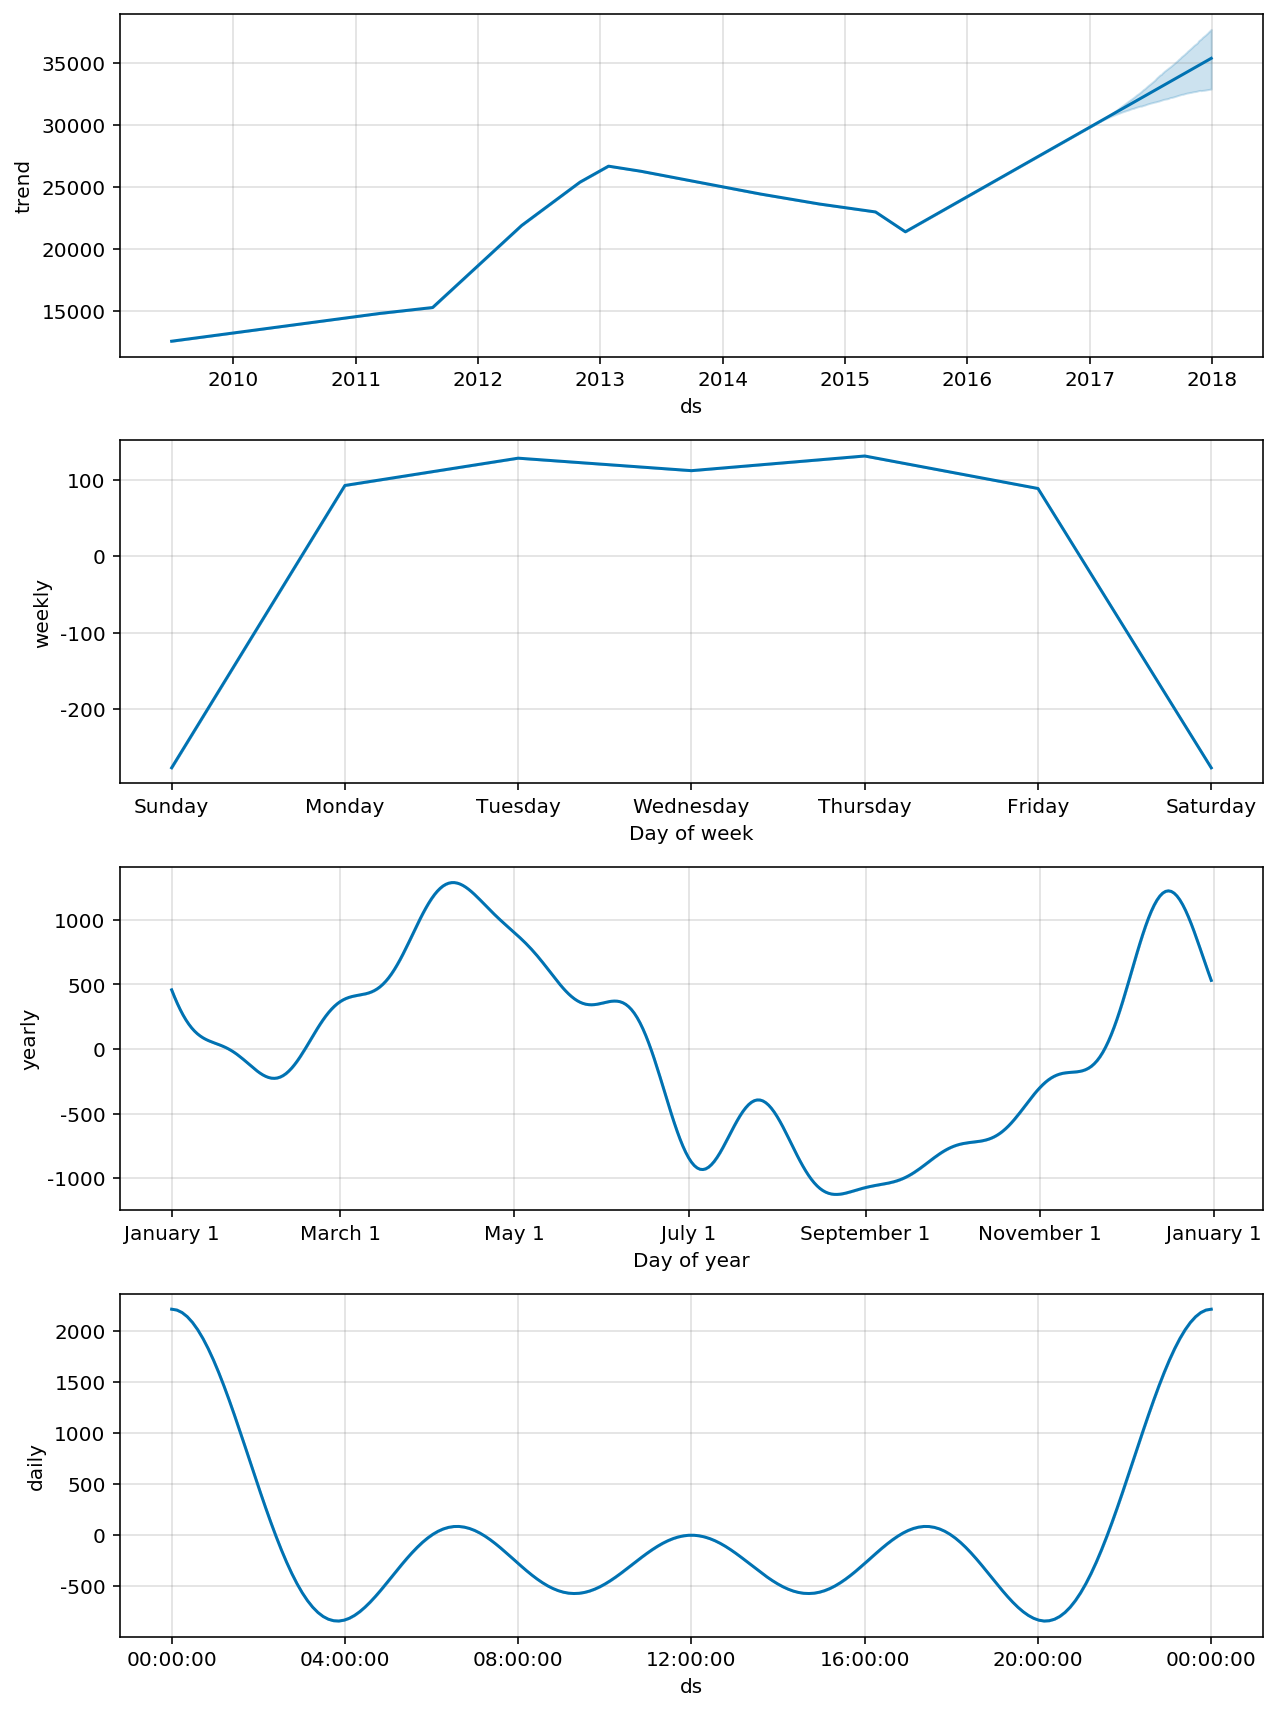

In [35]:
m.plot_components(forecast);

# 카카오 데이터로 그래프 그리기

In [36]:
df2 = pd.DataFrame({'ds':kk_trunc.index, 'y':kk_trunc['Close']})
df2.reset_index(inplace=True)
del df2['Date']
df2.head()

,ds,y
0,2009-07-01,43050.0
1,2009-07-02,42650.0
2,2009-07-03,43550.0
3,2009-07-06,43550.0
4,2009-07-07,45700.0


In [0]:
m2 = Prophet(daily_seasonality=True)
m2.fit(df2);

In [38]:
future2 = m2.make_future_dataframe(periods=365)
future2.tail()

,ds
2462,2018-12-24
2463,2018-12-25
2464,2018-12-26
2465,2018-12-27
2466,2018-12-28


In [39]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2462,2018-12-24,129402.775139,99156.755554,158836.827784
2463,2018-12-25,129784.442918,99364.897346,161852.039633
2464,2018-12-26,130070.296162,98409.401537,159921.947311
2465,2018-12-27,130121.848187,98303.816645,161432.208066
2466,2018-12-28,130269.321480,98826.875674,158811.973735


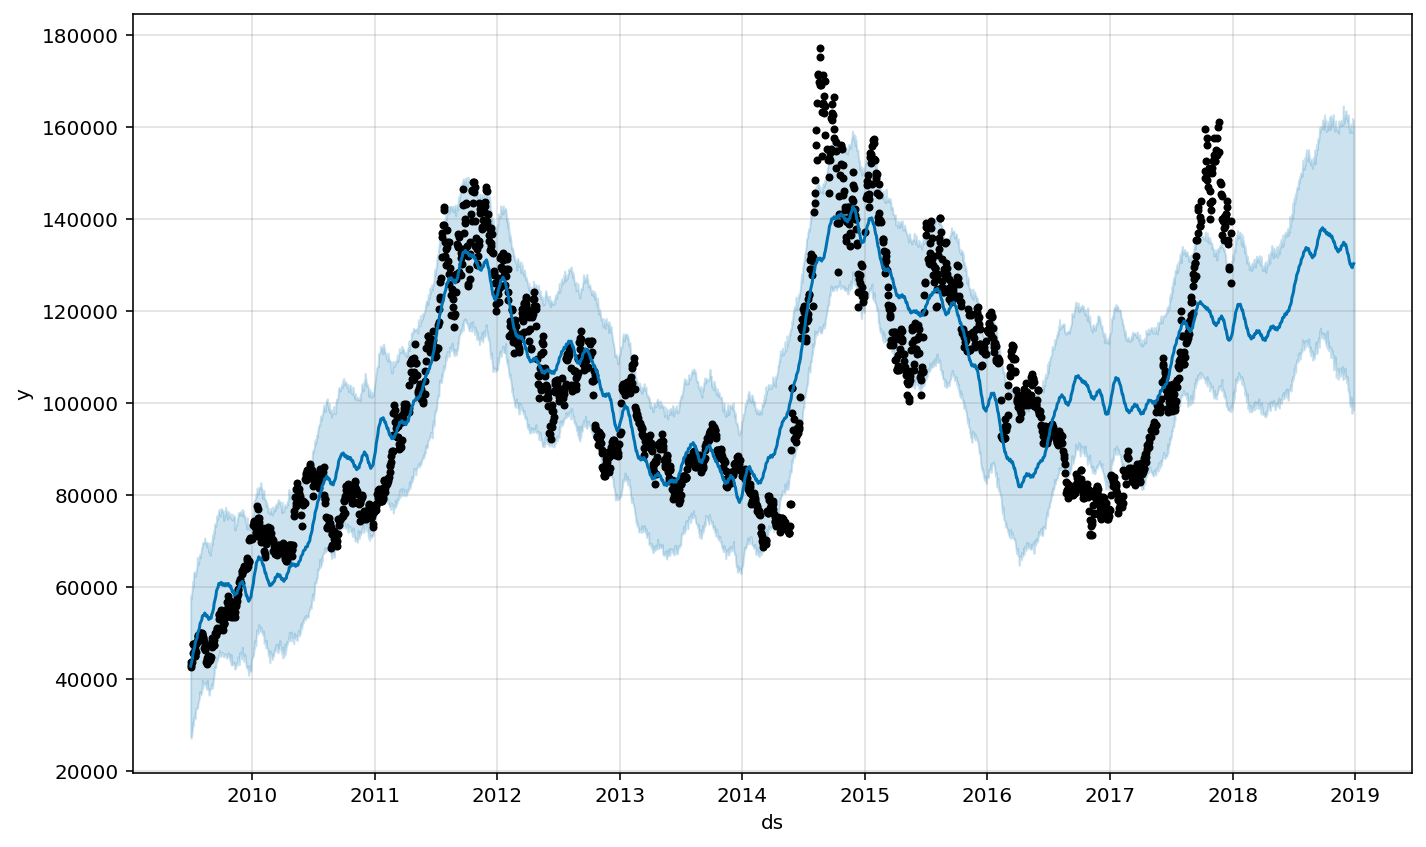

In [40]:
m2.plot(forecast2);

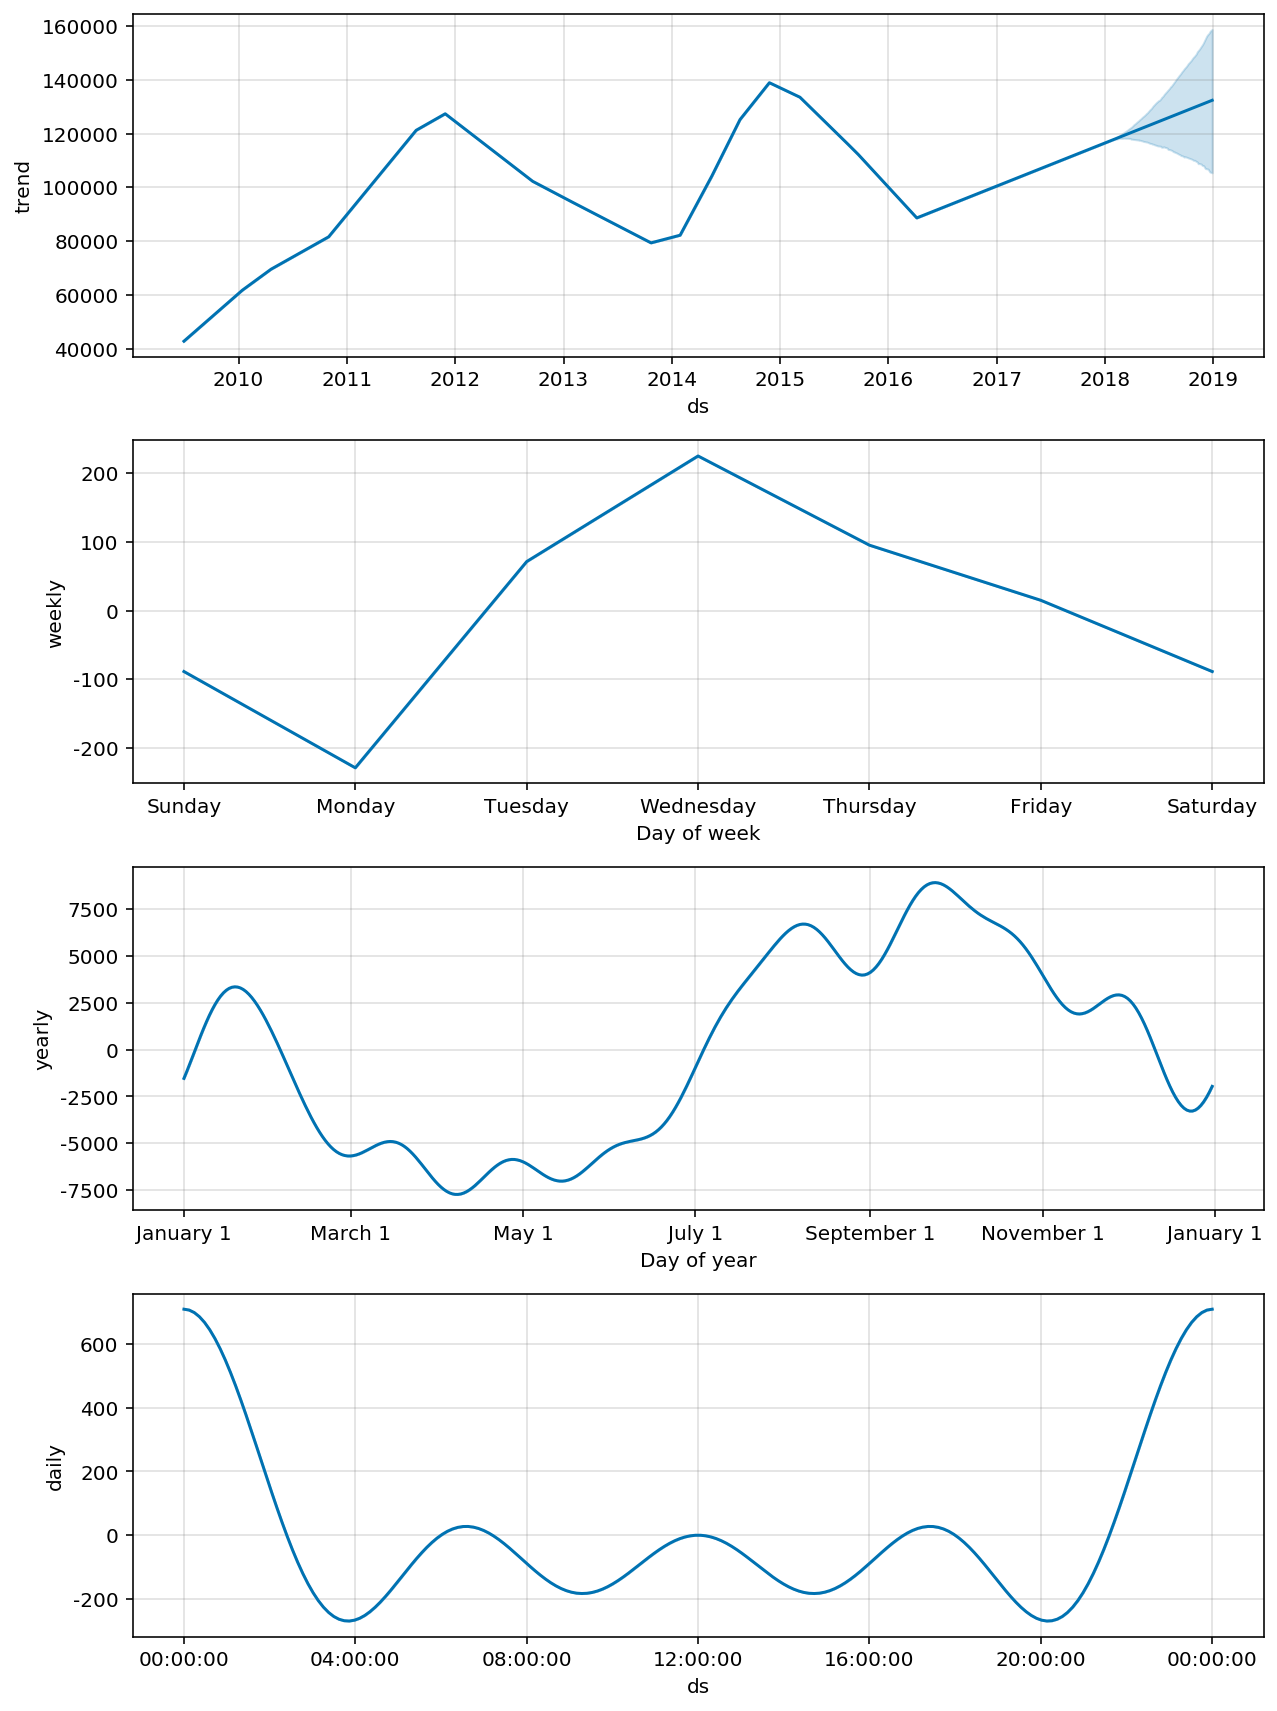

In [41]:
m2.plot_components(forecast2);

# 삼성 주가 가져오기 및 끝부분제거하고 예측 모델로 실제와 예측값 비교하기.
# KIA 주가 불러오는게 에러나서 삼성으로 바꿈.

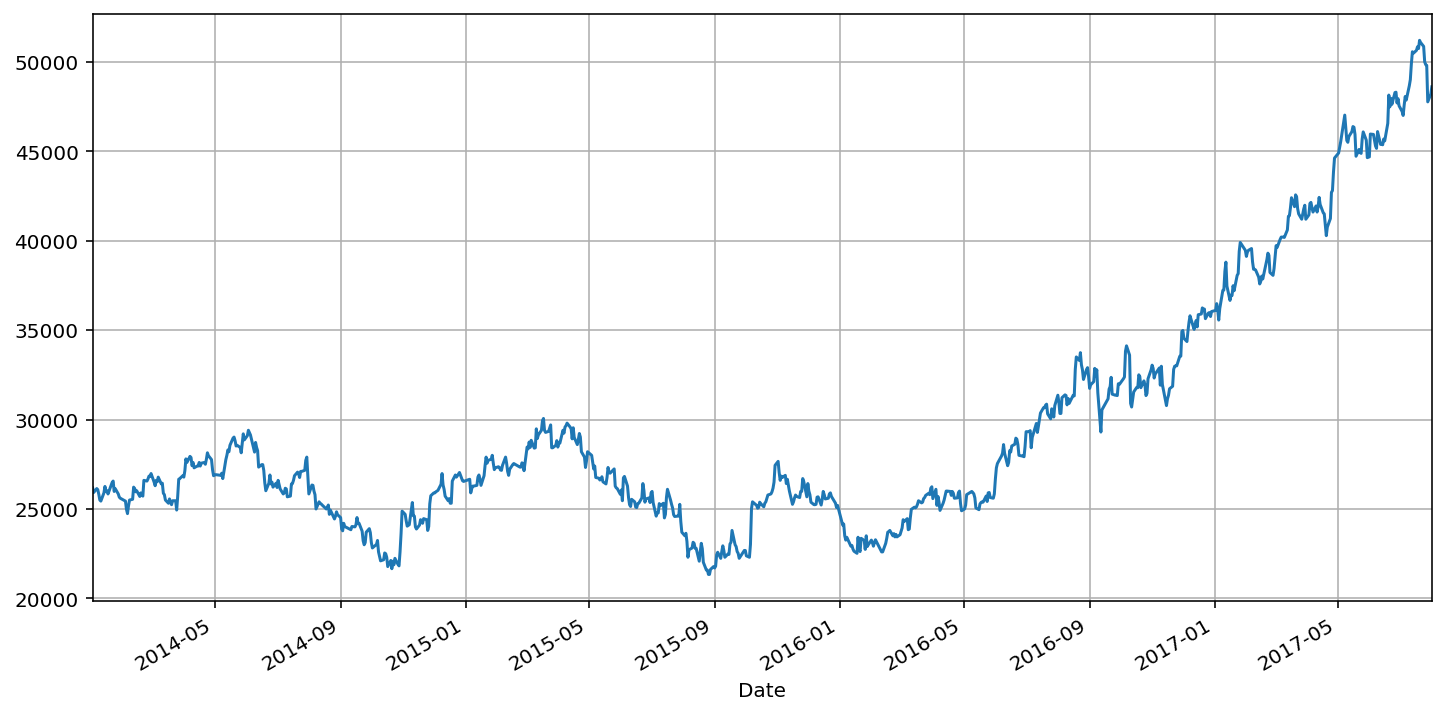

In [57]:
from pandas_datareader import data

start_date = datetime(2014,1,1) 
end_date = datetime(2017,7,31) 
KIA = data.get_data_yahoo('005930.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

# 2017년 5월 31일 이전 날짜 주가만 사용 이후는 예측할려고함.

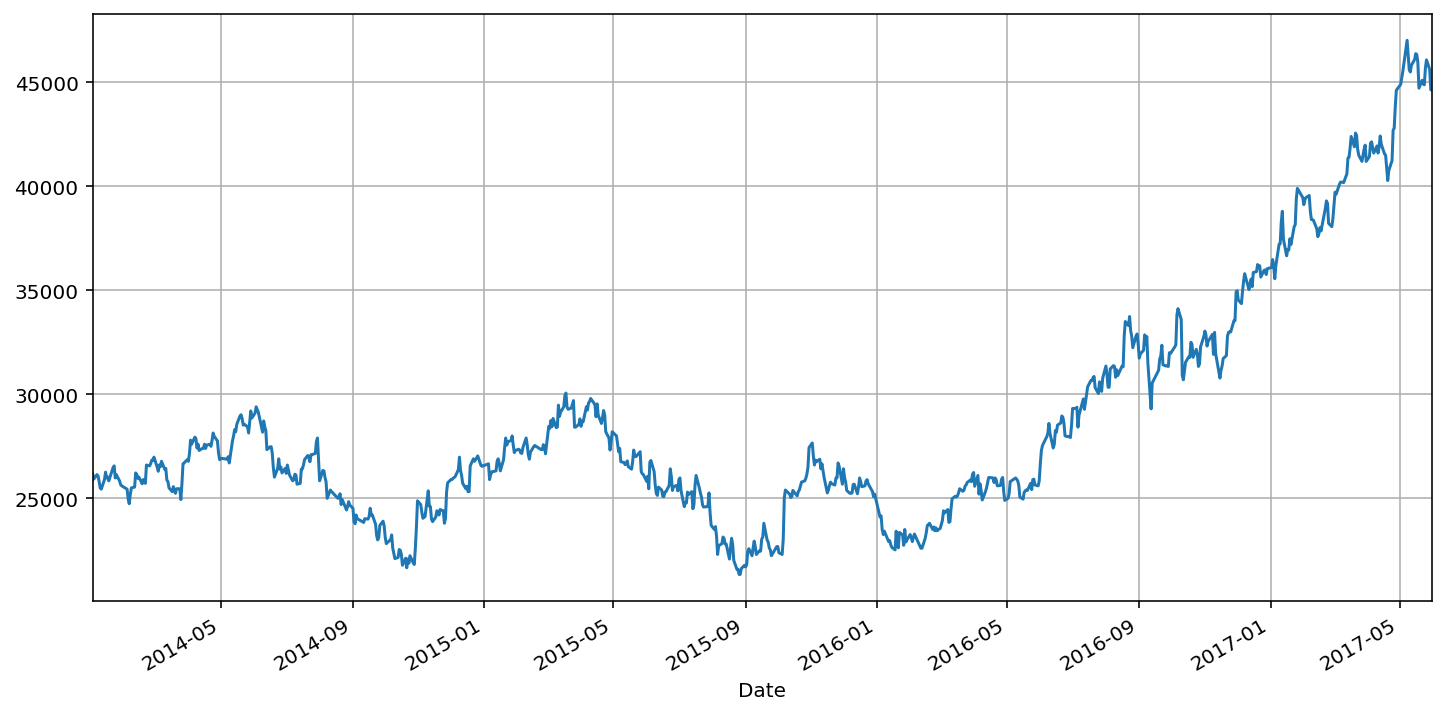

In [58]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [0]:
df3 = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df3.reset_index(inplace=True)
del df3['Date']

In [0]:
m3 = Prophet(daily_seasonality=True)
m3.fit(df3);

In [61]:
future3 = m3.make_future_dataframe(periods=61)
future3.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


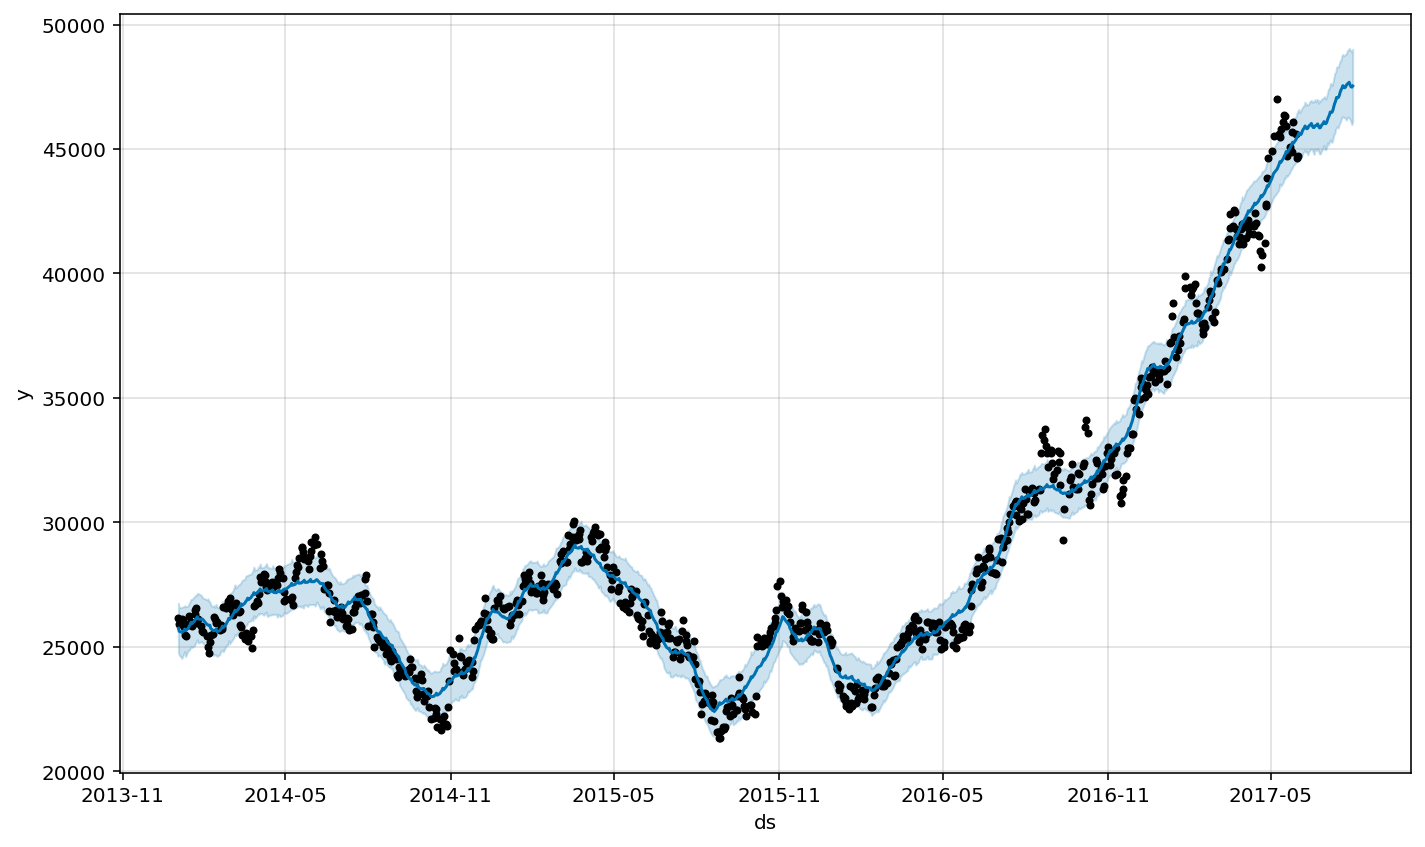

In [62]:
forecast3 = m3.predict(future3)
m3.plot(forecast3);

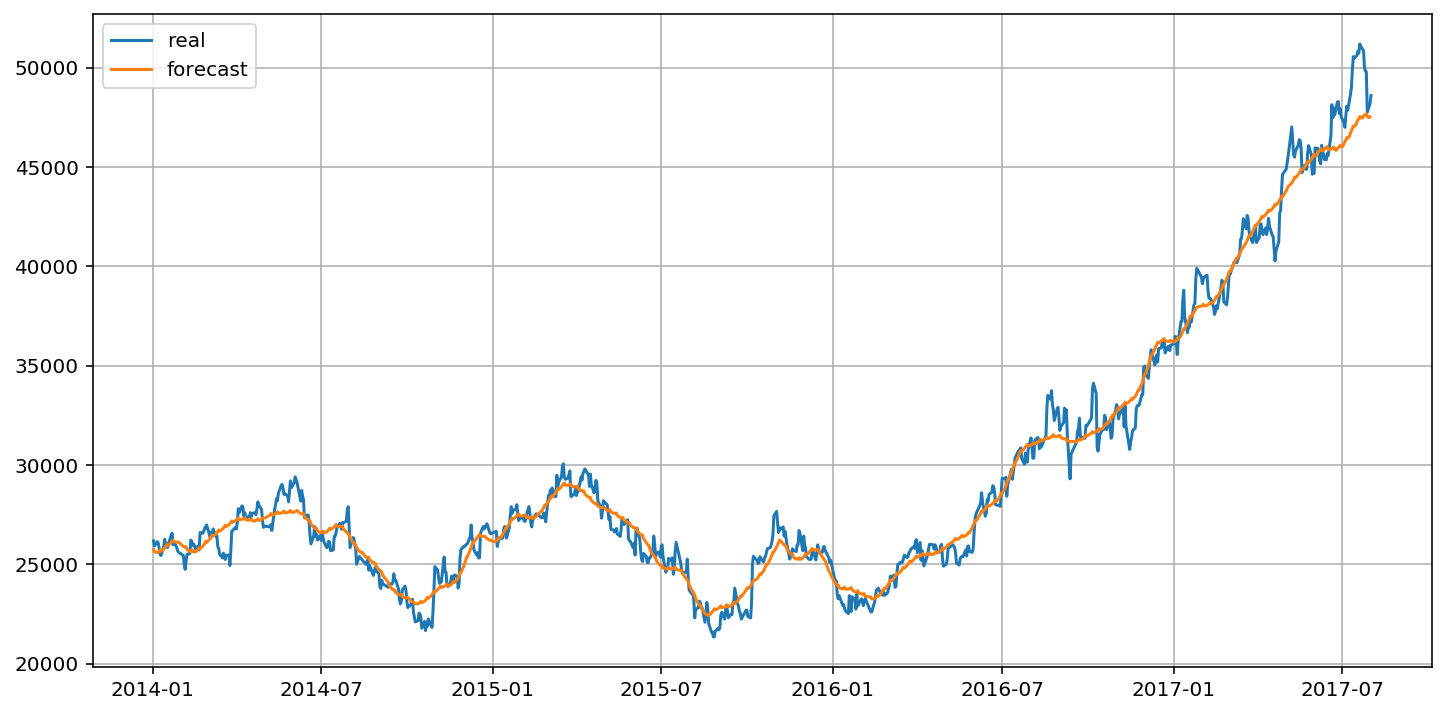

In [63]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast3['ds'], forecast3['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

# 7-4 Growth Model과 Holiday Forecast

In [74]:
from google.colab import files
uploaded = files.upload()

Saving 08. example_wp_R.csv to 08. example_wp_R (1).csv


In [89]:
df4 = pd.read_csv('08. example_wp_R.csv')
df4['y'] = np.log(df4['y'])
df4

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [0]:
df4['cap'] = 8.5 # 상한값
df4['floor'] = 5 # 하한값

In [104]:

m4 = Prophet(growth='logistic', daily_seasonality=True)
m4.fit(df4)

             ds  cap  floor
0    2008-01-01  8.5      5
1    2008-01-02  8.5      5
2    2008-01-03  8.5      5
3    2008-01-04  8.5      5
4    2008-01-05  8.5      5
...         ...  ...    ...
4684 2020-12-26  8.5      5
4685 2020-12-27  8.5      5
4686 2020-12-28  8.5      5
4687 2020-12-29  8.5      5
4688 2020-12-30  8.5      5

[4689 rows x 3 columns]


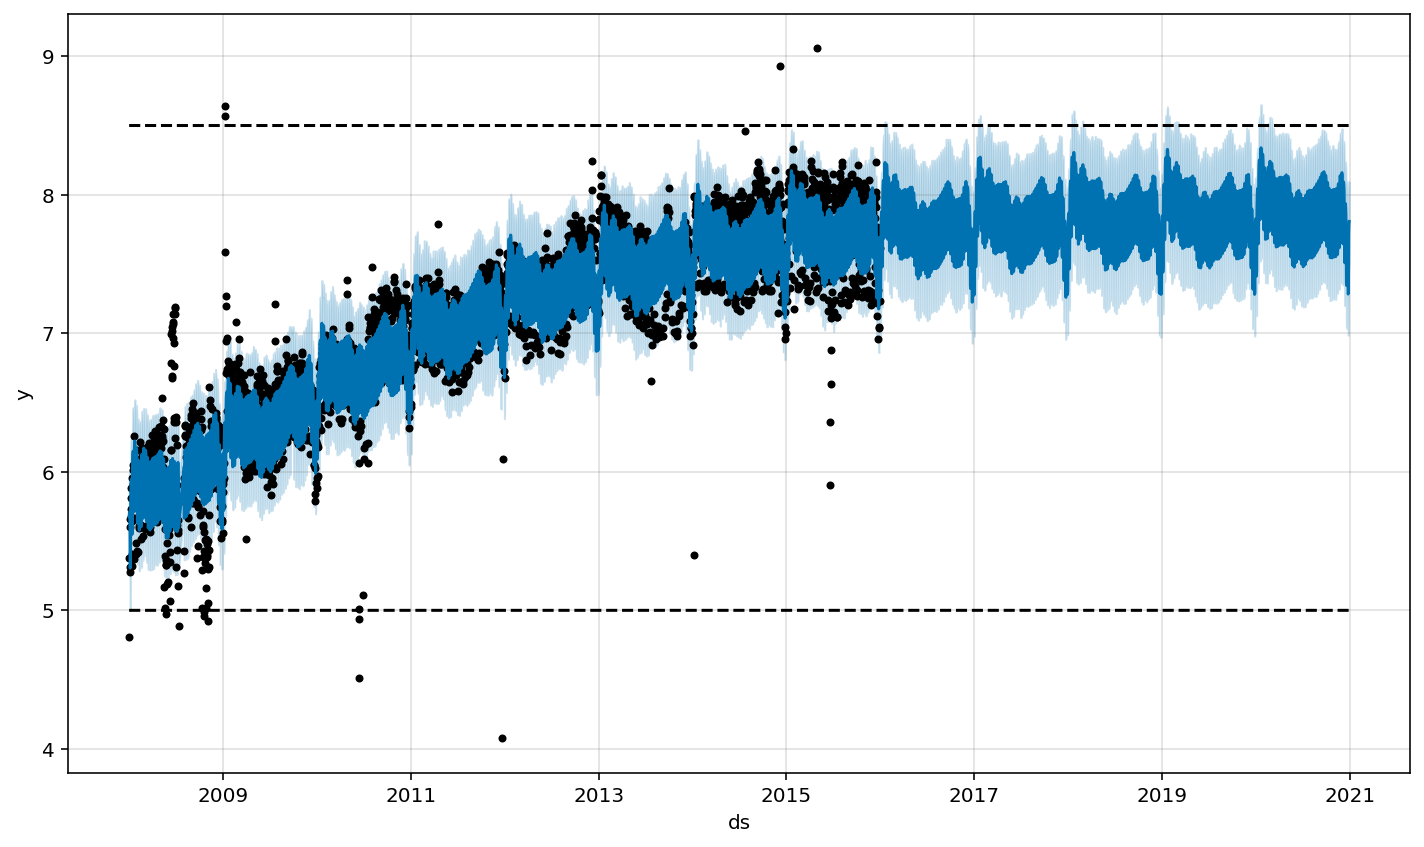

In [105]:
future4 = m4.make_future_dataframe(periods=1826)
future4['cap'] = 8.5 # 상한값
future4['floor'] = 5 # 하한값
fcst = m4.predict(future4)
m4.plot(fcst);
print(future4)

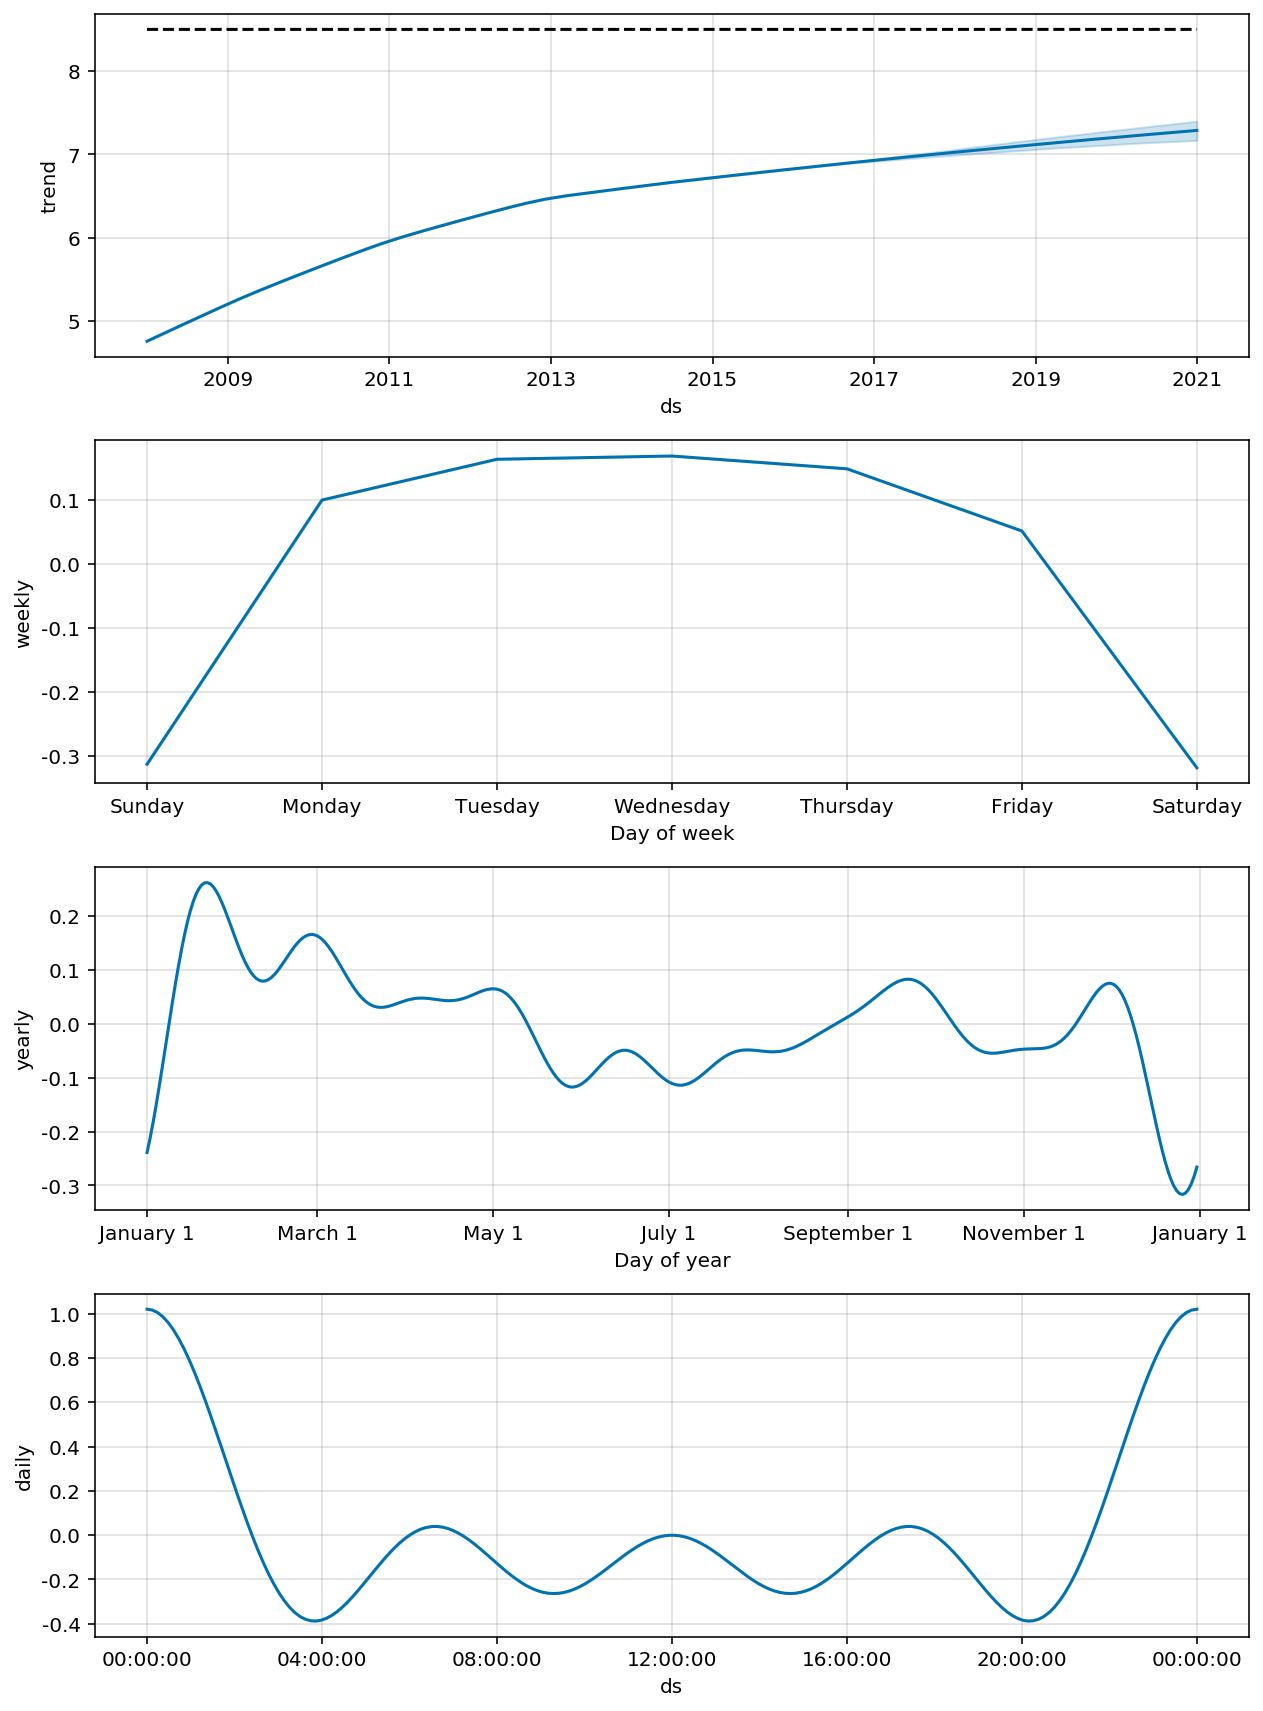

In [93]:

forecast4 = m4.predict(future4)
m4.plot_components(forecast4);

# holiday

In [0]:
df5 = pd.read_csv('08. example_wp_peyton_manning.csv')
df5['y'] = np.log(df5['y'])
m5 = Prophet(daily_seasonality=True)
m5.fit(df5)
future5 = m5.make_future_dataframe(periods=366)

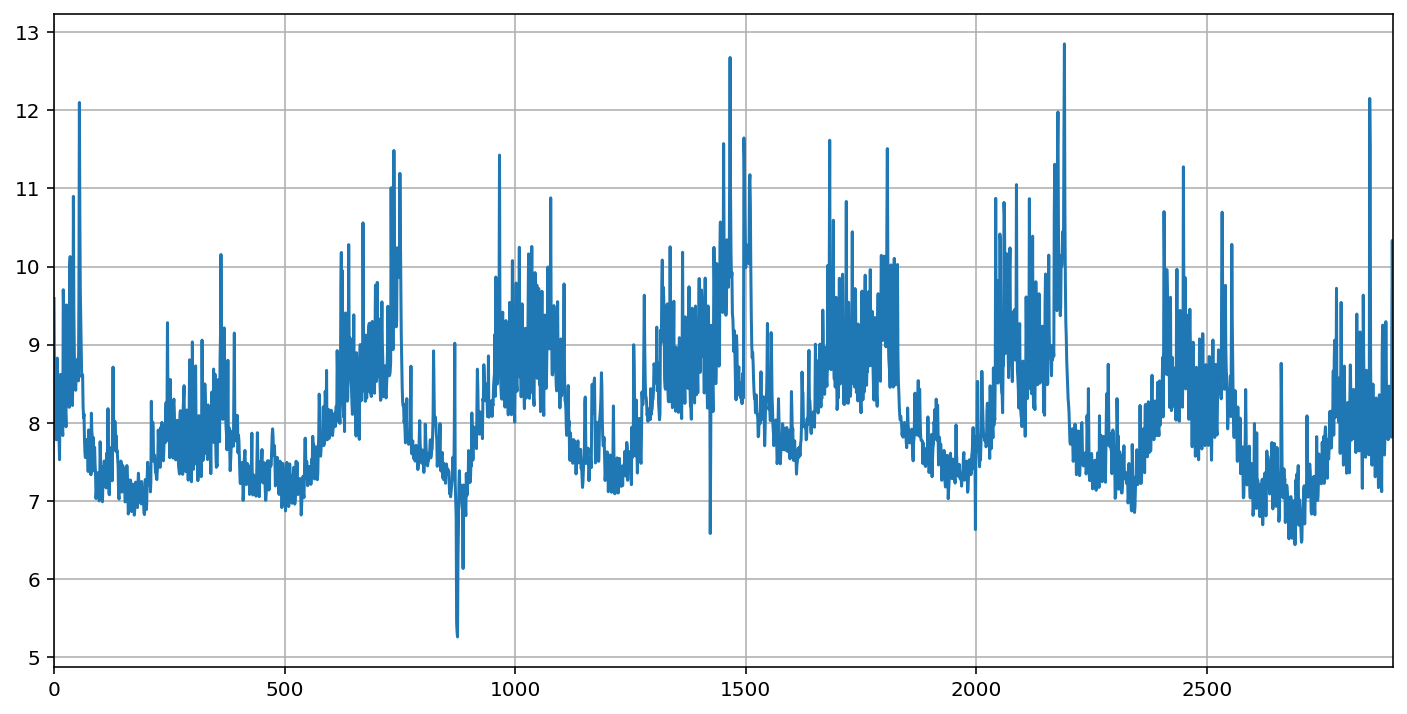

In [95]:

df5.y.plot(figsize=(12,6), grid=True);

In [0]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [0]:
m5 = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m5.fit(df).predict(future5)

In [99]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.214793,1.197684
2191,2014-02-03,1.889236,1.446581
2532,2015-01-11,1.214793,0.000000
2533,2015-01-12,1.889236,0.000000
2901,2016-01-17,1.214793,0.000000
2902,2016-01-18,1.889236,0.000000
2908,2016-01-24,1.214793,0.000000
2909,2016-01-25,1.889236,0.000000
2922,2016-02-07,1.214793,1.197684
2923,2016-02-08,1.889236,1.446581


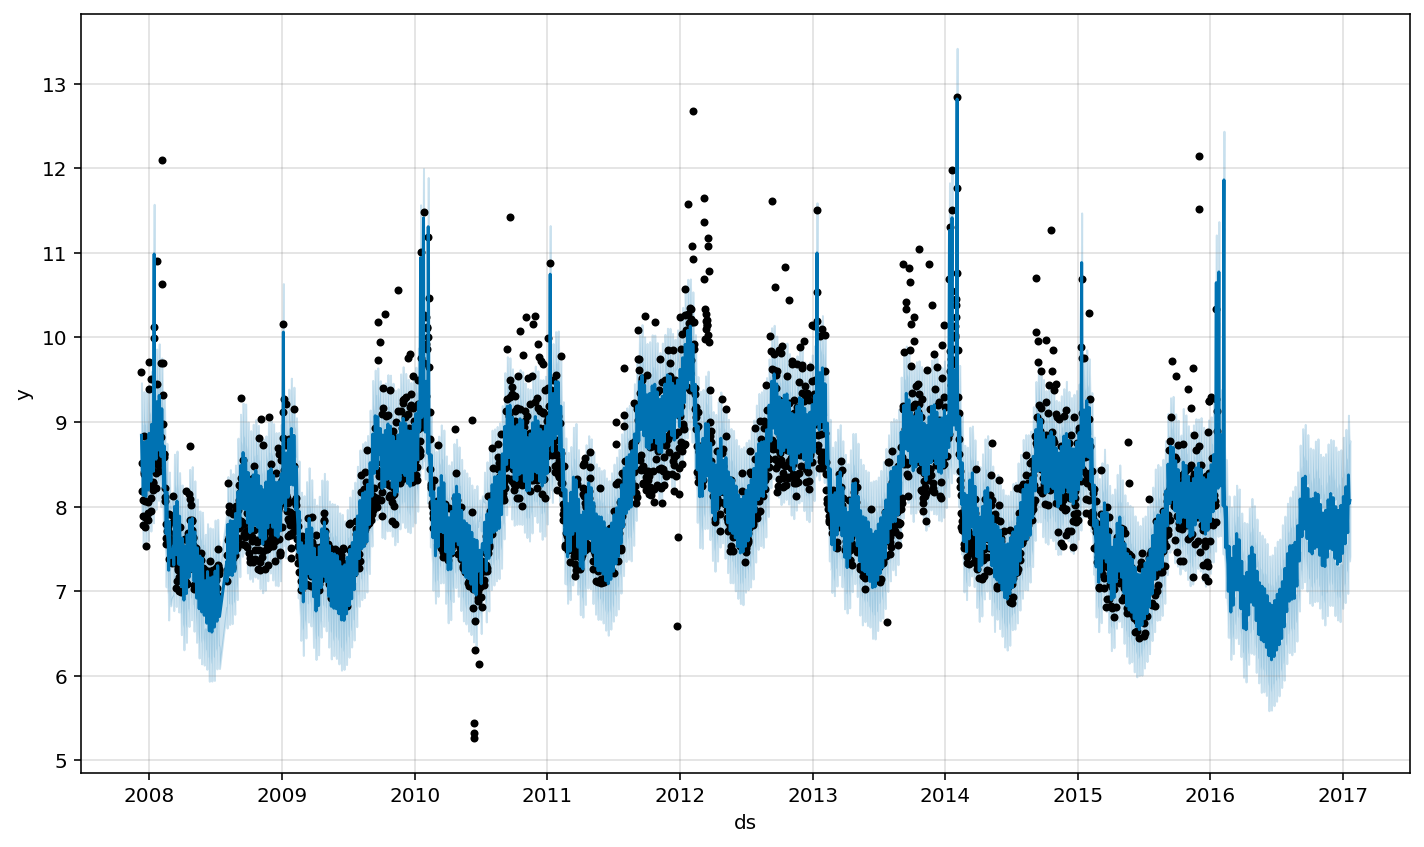

In [100]:
m5.plot(forecast);

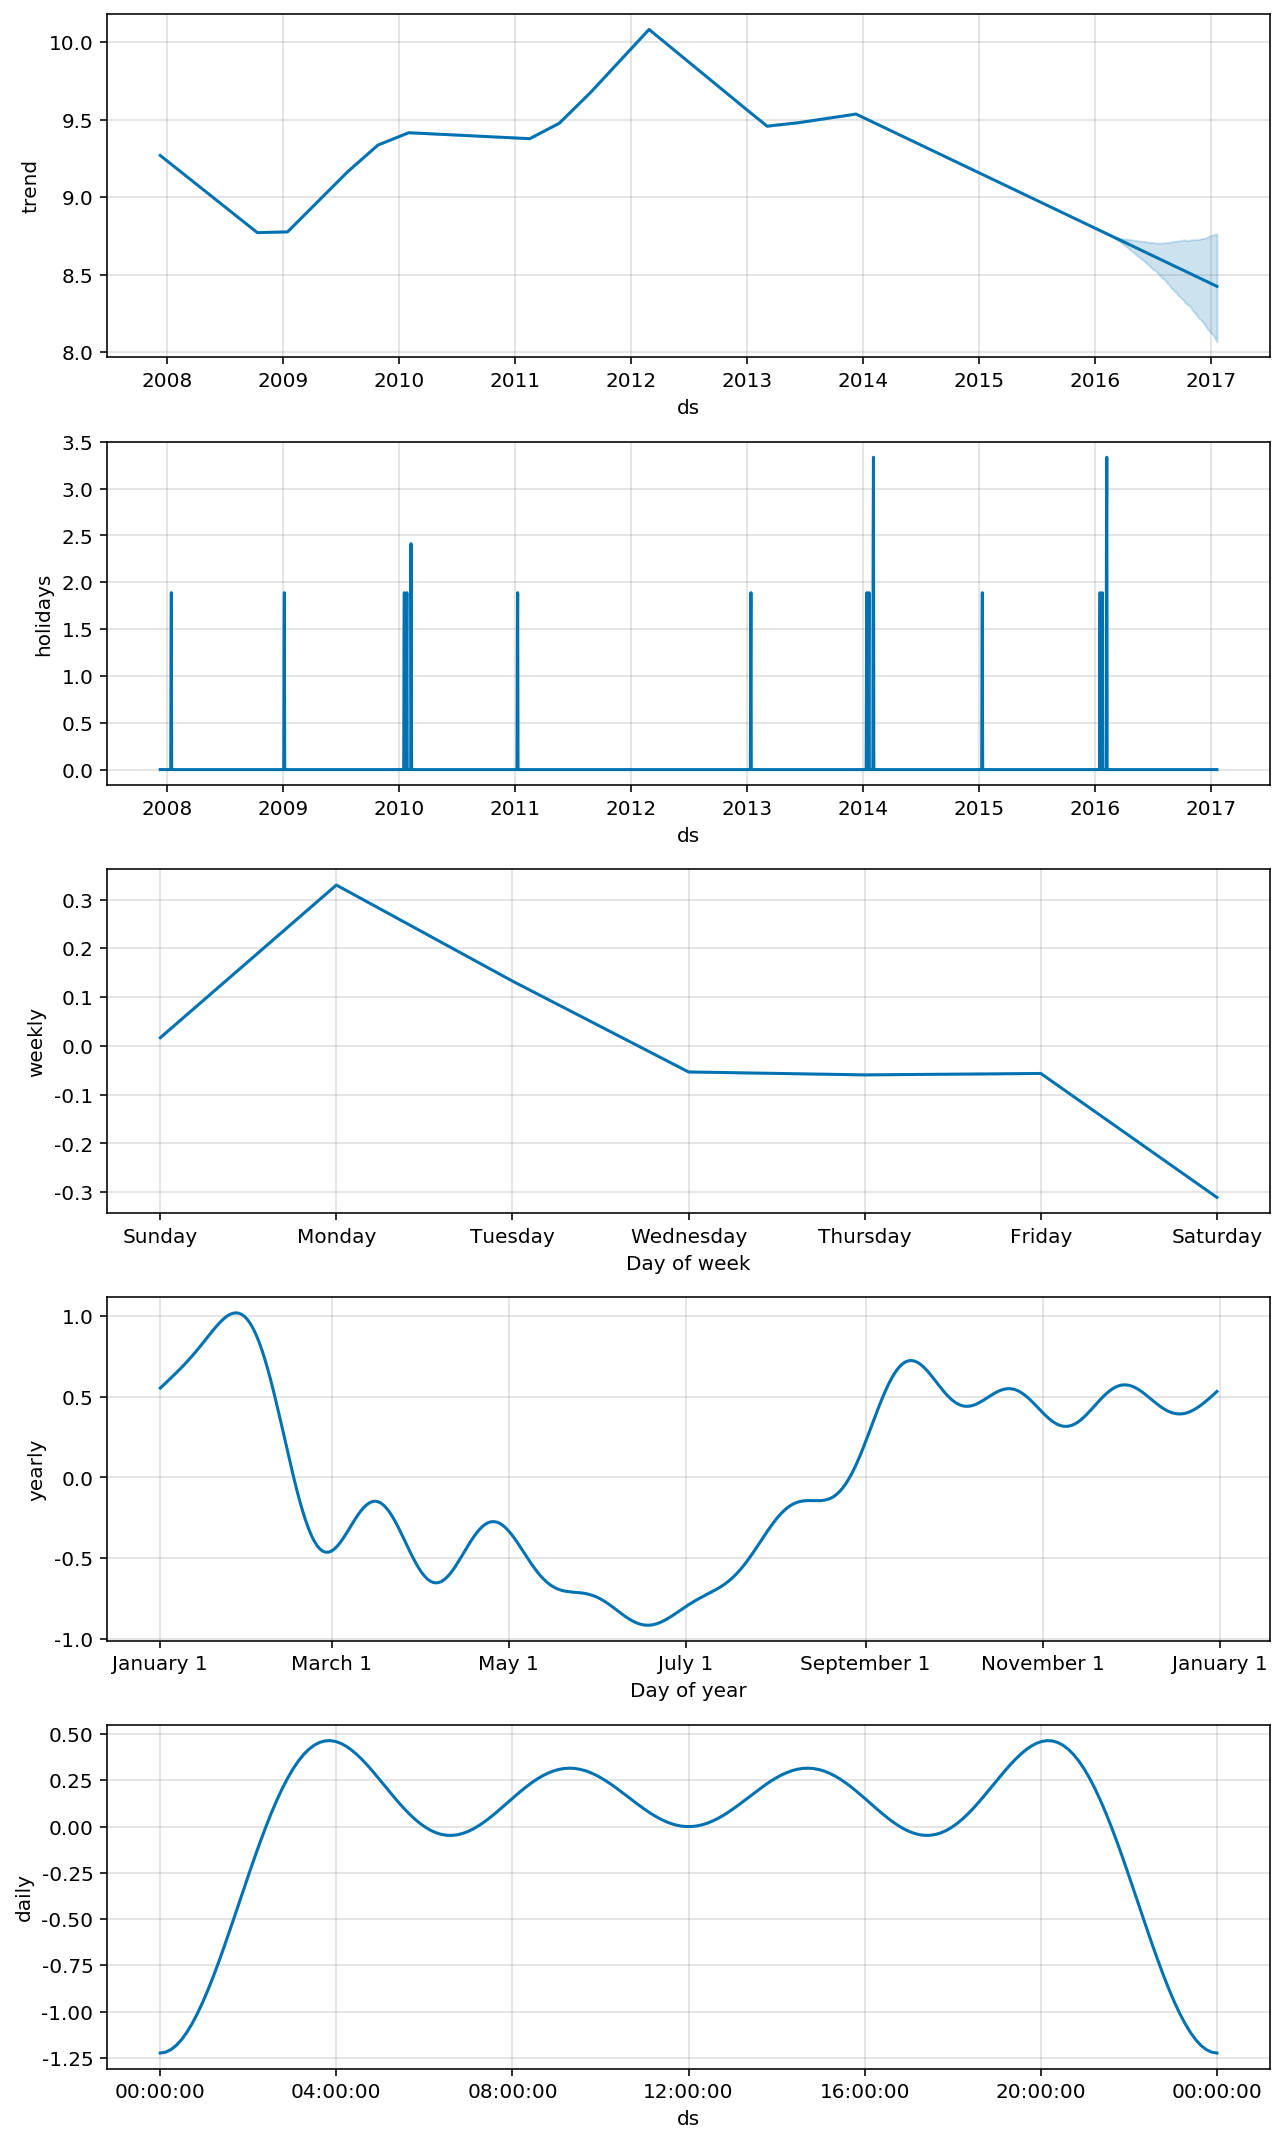

In [101]:
m5.plot_components(forecast);